# Job Posting Fake Detection
## Note Book 1 (_Preprocessing & Analysis_)

## Importing libraries

In [7]:
import pandas as pd

import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words as nltk_words
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

from langdetect import detect
import langid

import autocorrect
from spellchecker import SpellChecker


import plotly.graph_objs as go

import torch
from transformers import BertTokenizer, BertModel

from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Installing packages

In [6]:
# #preprocessing
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('words')
# nltk.download('omw-1.4')
# #detecting non-english
# !pip install langdetect
# !pip install langid
# #correcting spelling
# !pip install jedi
# !pip install pyspellchecker
# !pip install autocorrect
# !pip install pyenchant
# !pip install transformers

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=6837b3981e5075f8a17529ddea276ad1ba32f5f1bd61454ee0955d609a667546
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941187 sha256=8e8f141d1d811ca6baa7f48ac2dcc2f38d2723bf154637d386d115af15a7fd85
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Succe

In [3]:
# !pip install spacy
# !pip install pydantic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
df = pd.read_csv("train_CCS.csv")
#df_test = pd.read_csv("test_CCS.csv")

In [31]:
df.head()

,job title,office location,department,salary offered for the job,company information,job description,job requirements,benefits,telecommuting,company logo exist?,has_questions,employment_type,experience required,education required,industry,function,fake?
0,Videographer / Editor / Photographer,"GB, LND, Notting Hill",NaN,NaN,Dreamers &amp; Creators is a creative agency t...,The Videographer / Editor / Photographer will ...,Minimum 1 year experience as an videographer /...,NaN,0,1,1,Full-time,Not Applicable,Unspecified,Apparel & Fashion,Art/Creative,no
1,Supply Chain Manager,"GR, I, Kifisia",Wholesale,NaN,Η πρώτη στεγασμένη αγορά παραγωγών με παντοπωλ...,Buyer will be in charge of expanding our vendo...,Skills required:MS-Office excellentExperience ...,In private,0,1,1,NaN,NaN,NaN,NaN,NaN,no
2,Digital Project Manager,"US, CA, El Segundo",Product Development,NaN,ConsumerTrack is a technology-centric internet...,We are looking for a Digital Project Manager t...,2+ years of project management experience in w...,Competitive salary with excellent growth oppor...,0,1,1,NaN,NaN,NaN,NaN,NaN,no
3,Global Communications Manager,"GB, LND, London",Marketing,NaN,Founded in 2010 by a team from Google’s London...,"Qubit: Cutting Edge Big Data EngineeringQubit,...",Who You AreBy submitting your application you ...,Plenty of perksAs well as the opportunity to s...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Marketing,no
4,S3I Candidates,"LT, ,",All,NaN,NaN,Adform is a premier partner for media agencies...,DCO Team in Kaunas:Front End Developer #URL_82...,NaN,0,1,0,Full-time,NaN,NaN,Information Technology and Services,NaN,no


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12841 entries, 0 to 12840
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   job title                   12841 non-null  object
 1   office location             12582 non-null  object
 2   department                  4581 non-null   object
 3   salary offered for the job  2089 non-null   object
 4   company information         10436 non-null  object
 5   job description             12841 non-null  object
 6   job requirements            10900 non-null  object
 7   benefits                    7596 non-null   object
 8   telecommuting               12841 non-null  int64 
 9   company logo exist?         12841 non-null  int64 
 10  has_questions               12841 non-null  int64 
 11  employment_type             10313 non-null  object
 12  experience required         7755 non-null   object
 13  education required          6988 non-null   ob

#Filling missing values

In [33]:
#CHECKING the precentage of NULL VALUES
nulls=df.isnull().sum()
nulls = round(nulls[nulls!=0] / 27999*100, 3)
nulls

office location                0.925
department                    29.501
salary offered for the job    38.401
company information            8.590
job requirements               6.932
benefits                      18.733
employment_type                9.029
experience required           18.165
education required            20.904
industry                      12.665
function                      16.640
dtype: float64

In [34]:
df["employment_type"].fillna(value="Other", inplace=True)
df["experience required"].fillna(value="Not Applicable", inplace=True)
df["education required"].fillna(value="Unspecified", inplace=True)

In [35]:
df.fillna(value="not mentioned", inplace=True)

In [36]:
#CHECKING the precentage of NULL VALUES
nulls=df.isnull().sum()
nulls = round(nulls[nulls!=0] / 27999*100, 3)
nulls

Series([], dtype: float64)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12841 entries, 0 to 12840
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   job title                   12841 non-null  object
 1   office location             12841 non-null  object
 2   department                  12841 non-null  object
 3   salary offered for the job  12841 non-null  object
 4   company information         12841 non-null  object
 5   job description             12841 non-null  object
 6   job requirements            12841 non-null  object
 7   benefits                    12841 non-null  object
 8   telecommuting               12841 non-null  int64 
 9   company logo exist?         12841 non-null  int64 
 10  has_questions               12841 non-null  int64 
 11  employment_type             12841 non-null  object
 12  experience required         12841 non-null  object
 13  education required          12841 non-null  ob

# Analysis 

Text(0.5, 0, 'Countries')

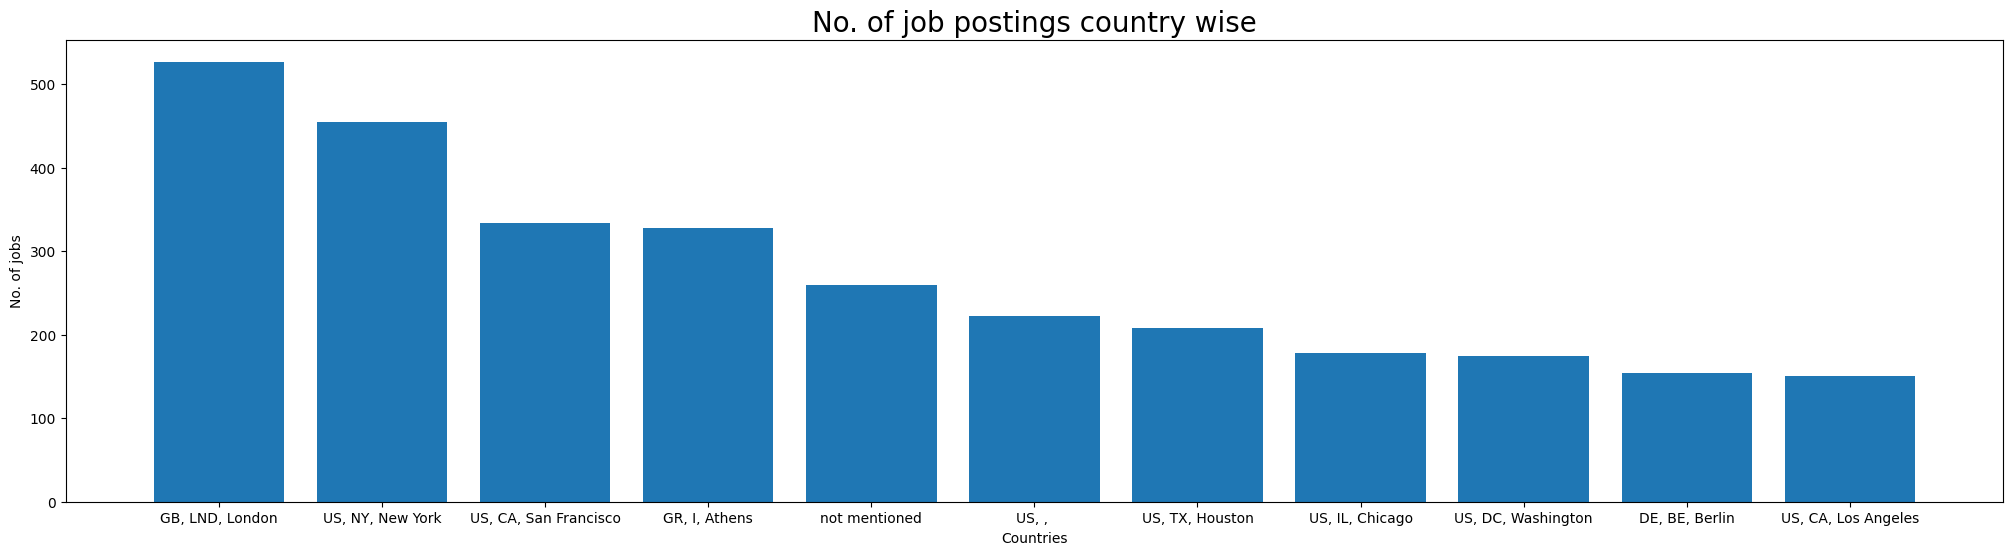

In [ ]:
country = dict(df["office location"].value_counts()[:11])

plt.figure(figsize=(25,6))
plt.title('No. of job postings country wise', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

Text(0.5, 0, 'experience required')

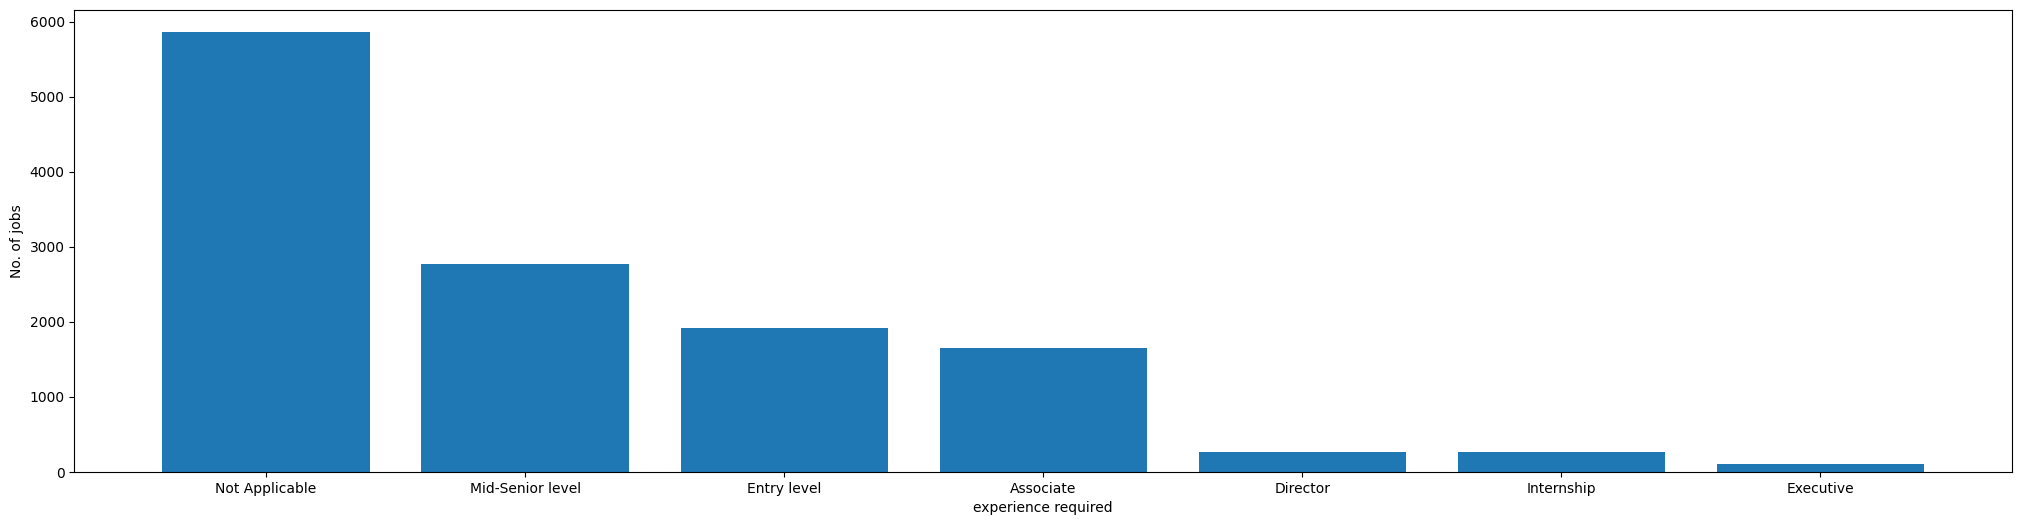

In [ ]:
ex = dict(df["experience required"].value_counts())
plt.figure(figsize=(25,6))
plt.bar(ex.keys(), ex.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('experience required', size=10)

Text(0.5, 0, 'education required')

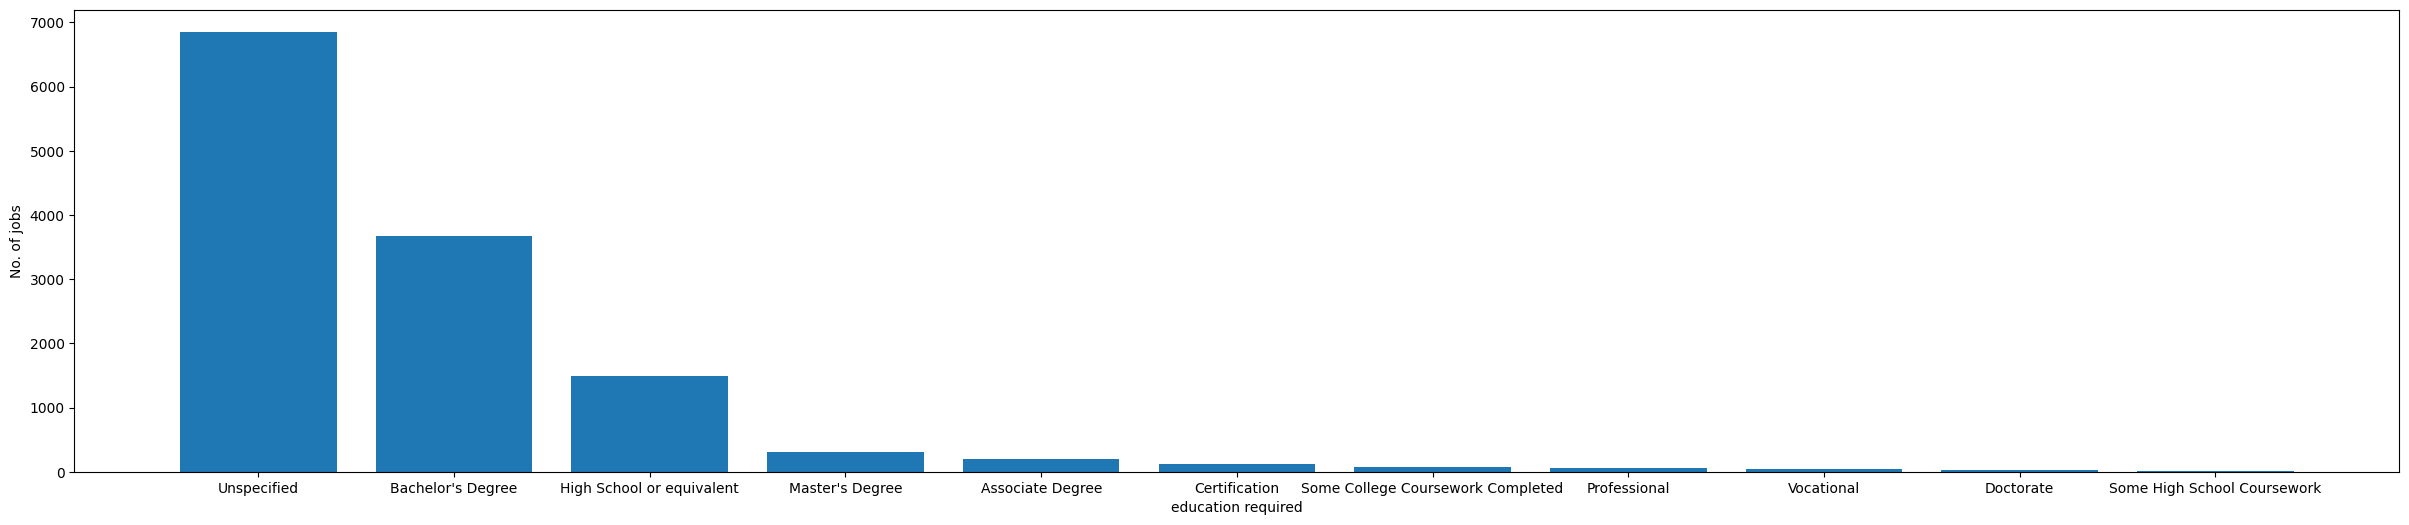

In [ ]:
ed = dict(df["education required"].value_counts()[:11])
plt.figure(figsize=(30,6))
plt.bar(ed.keys(), ed.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('education required', size=10)

In [ ]:
# Count the number of occurrences of each value in the 'target' column
balance_counts = df['fake?'].value_counts()

# Display the counts
print(balance_counts)

no     12141
yes      700
Name: fake?, dtype: int64


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['no'],
    y=[balance_counts[0]],
    name='no',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color='Steel Blue'
))
fig.add_trace(go.Bar(
    x=['yes'],
    y=[balance_counts[1]],
    name='yes',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color='Salmon  '
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by target</span>',
    plot_bgcolor='Light Gray'
)
fig.show()


In [38]:
df["Full job"] = "job title: " + df["job title"] + " - the location of the company is " + df["office location"] + " - the depatment you will work at is " + df["department"] + " - the salary offered is " + df["salary offered for the job"] + " - and here is the company information: " + df["company information"] + " - the job description: " +df["job description"] + " - and here are the requirments of the job: " + df["job requirements"] + " - the benfits you will gain: " + df["benefits"] + " - industry: " + df["industry"] + " - you funtion: " + df["function"]

In [39]:
#incoding fake? column
df["fake?"].replace(to_replace="no",value=0,inplace=True)
df["fake?"].replace(to_replace="yes",value=1,inplace=True)

In [40]:
Real = df[df["fake?"]==0]["Full job"]
fake = df[df["fake?"]==1]["Full job"]

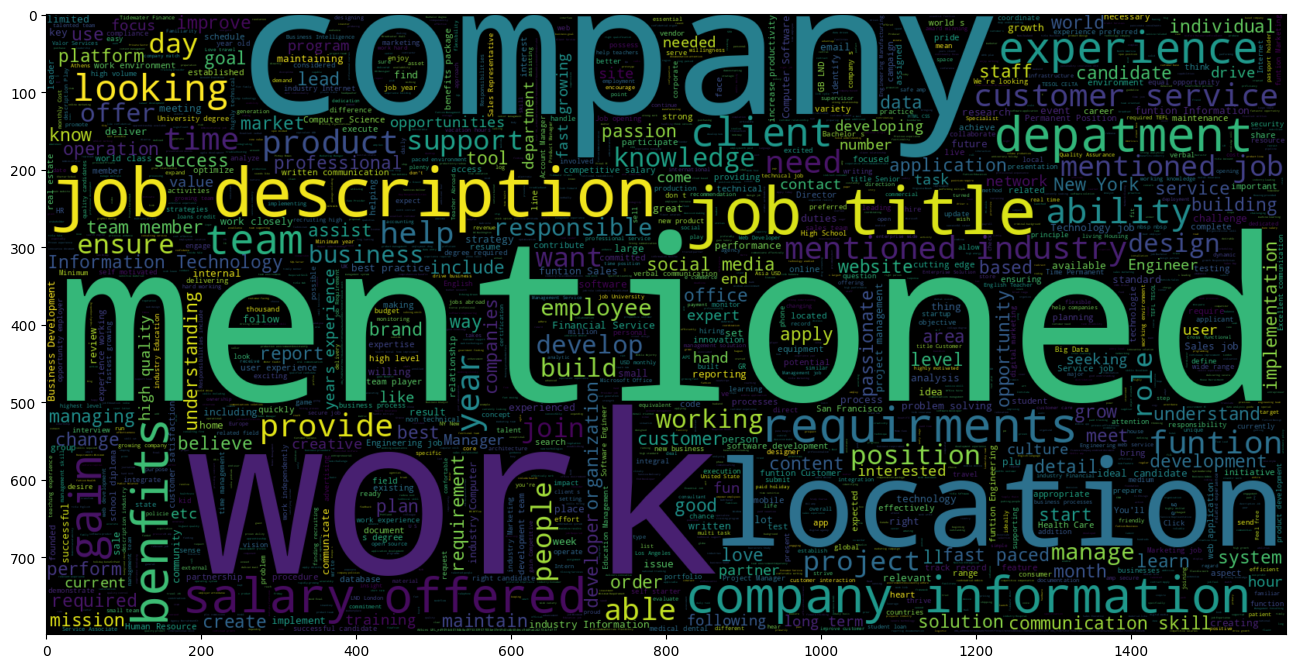

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(Real)))
plt.imshow(wc,interpolation = 'bilinear')

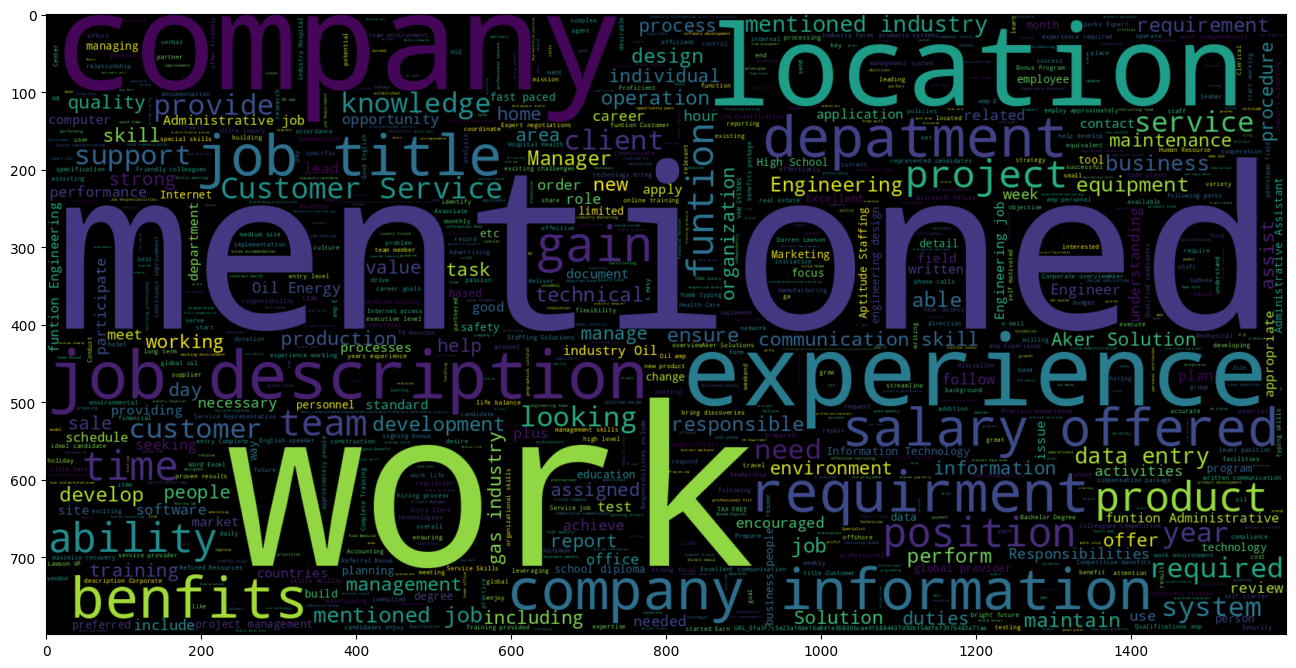

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fake)))
plt.imshow(wc,interpolation = 'bilinear')

# preprocessing

In [41]:
df.drop("job title" ,axis = 1 , inplace = True)
df.drop("office location" ,axis = 1 , inplace = True)
df.drop("department" ,axis = 1 , inplace = True)
df.drop("salary offered for the job" ,axis = 1 , inplace = True)
df.drop("company information" ,axis = 1 , inplace = True)
df.drop("job description" ,axis = 1 , inplace = True)
df.drop("job requirements" ,axis = 1 , inplace = True)
df.drop("benefits" ,axis = 1 , inplace = True)
df.drop("industry" ,axis = 1 , inplace = True)
df.drop("function" ,axis = 1 , inplace = True)

In [42]:
df["employment_type"].unique()

array(['Full-time', 'Other', 'Contract', 'Part-time', 'Temporary'],
      dtype=object)

In [43]:
df["experience required"].unique()

array(['Not Applicable', 'Mid-Senior level', 'Entry level', 'Associate',
       'Executive', 'Director', 'Internship'], dtype=object)

In [44]:
df["education required"].unique()

array(['Unspecified', "Bachelor's Degree", 'High School or equivalent',
       'Professional', "Master's Degree", 'Vocational',
       'Associate Degree', 'Some College Coursework Completed',
       'Vocational - Degree', 'Certification',
       'Some High School Coursework', 'Vocational - HS Diploma',
       'Doctorate'], dtype=object)

In [45]:
df["employment_type"].replace(to_replace="Other",value=0,inplace=True)
df["employment_type"].replace(to_replace="Temporary",value=1,inplace=True)
df["employment_type"].replace(to_replace="Part-time",value=2,inplace=True)
df["employment_type"].replace(to_replace="Full-time",value=3,inplace=True)
df["employment_type"].replace(to_replace="Contract",value=4,inplace=True)

In [46]:
df["experience required"].replace(to_replace="Not Applicable",value=0,inplace=True)
df["experience required"].replace(to_replace="Internship",value=1,inplace=True)
df["experience required"].replace(to_replace="Entry level",value=2,inplace=True)
df["experience required"].replace(to_replace="Mid-Senior level",value=3,inplace=True)
df["experience required"].replace(to_replace="Associate",value=4,inplace=True)
df["experience required"].replace(to_replace="Executive",value=5,inplace=True)
df["experience required"].replace(to_replace="Director",value=6,inplace=True)

In [47]:
df['education required'].unique()

array(['Unspecified', "Bachelor's Degree", 'High School or equivalent',
       'Professional', "Master's Degree", 'Vocational',
       'Associate Degree', 'Some College Coursework Completed',
       'Vocational - Degree', 'Certification',
       'Some High School Coursework', 'Vocational - HS Diploma',
       'Doctorate'], dtype=object)

In [48]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  

df['education required']= label_encoder.fit_transform(df['education required'])
import pickle
pickle.dump(label_encoder, open('encoder', 'wb'))
df['education required'].unique()

array([ 9,  1,  4,  6,  5, 10,  0,  7, 11,  2,  8, 12,  3])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12841 entries, 0 to 12840
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   telecommuting        12841 non-null  int64 
 1   company logo exist?  12841 non-null  int64 
 2   has_questions        12841 non-null  int64 
 3   employment_type      12841 non-null  int64 
 4   experience required  12841 non-null  int64 
 5   education required   12841 non-null  int64 
 6   fake?                12841 non-null  int64 
 7   Full job             12841 non-null  object
dtypes: int64(7), object(1)
memory usage: 802.7+ KB


###Handling Concatenated Words

In [ ]:
def separate_concatenated_words(text):
    if isinstance(text, str):
        # Split concatenated words with white space
        words = re.findall(r'\w+', text)
        separated_words = [re.sub('([a-z])([A-Z])', r'\1 \2', word) for word in words]
        return ' '.join(separated_words)
    else:
        return text

In [ ]:
df['Full job']=df['Full job'].apply(separate_concatenated_words)

### Remove special characters , tags and stopwords(except {"it","not"})

In [ ]:
def preprocess_text(text):
    if isinstance(text, str):
        # Remove any URLs or email addresses
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        text = re.sub(r'\S+@\S+', '', text)

        # Remove any sequence of alphanumeric characters starting with 'URL'
        text = re.sub(r'URL\w+', '', text)

        # Remove any non-alphanumeric characters
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

        # Split the text into sentences
        sentences = sent_tokenize(text)

        preprocessed_sentences = []
        for sentence in sentences:
            words = nltk.word_tokenize(sentence)

            # Remove any word contains numbers
            words = [word for word in words if not re.match('\w*\d\w*', word)]

            # Remove any word that is a stop word except "not", "Not", "IT", and "it"
            stop_words = set(nltk.corpus.stopwords.words('english'))
            stop_words.discard('not')
            stop_words.discard('Not')
            stop_words.discard('it')
            stop_words.discard('IT')
            words = [word for word in words if word.lower() not in stop_words or word.lower() in {'not', 'it'}]

            preprocessed_sentence = ' '.join(words)
            preprocessed_sentences.append(preprocessed_sentence)

        # Join the preprocessed sentences back together into a single string
        cleaned_text = ' '.join(preprocessed_sentences)

        return cleaned_text
    else:
        return text


In [ ]:
df['Full job']= df['Full job'].apply(preprocess_text)

### Differentiate between "IT" and "it"

In [ ]:
def replace_it(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'\b(it|It)\b', '', x) if isinstance(x, str) else x)
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'\bIT\b', 'IT', x) if isinstance(x, str) else x)
    return df

In [ ]:
#check if it's a noun then keep it else it's a stopword therefore it will be removed
df = replace_it(df, 'Full job')

### Handling extra Whitespace


In [ ]:
def remove_extra_whitespace(text):
    if isinstance(text, str):
        # Replace one or more whitespace characters with a single space
        text = re.sub(r'\s+', ' ', text)

        return text.strip()  # Remove leading and trailing whitespace
    else:
        return text


In [ ]:
df = df.applymap(remove_extra_whitespace)

### Lowercase

In [ ]:
def lowercase_text(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.lower()
    return df

In [ ]:
df = lowercase_text(df)  

### Remove duplicates (except "not")

In [ ]:
def remove_duplicates(text):
    if isinstance(text, list):
        word_list = text
    elif isinstance(text, str):
        word_list = text.split()
    else:
        return text
    
    unique_words = []
    for i, word in enumerate(word_list):
        if word not in unique_words:
            unique_words.append(word)
        elif i == 0:
            continue
        else:
            unique_words[-1] += ' ' + word
    
    if isinstance(text, list):
        return unique_words
    elif isinstance(text, str):
        return ' '.join(unique_words)


In [ ]:
df['Full job'] = df['Full job'].apply(remove_duplicates)

In [ ]:
df = df.applymap(remove_extra_whitespace)

In [ ]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    if isinstance(text, str):
        # Split the text into sentences
        sentences = sent_tokenize(text)

        # Lemmatize each word in each sentence
        lemmatized_sentences = []
        for sentence in sentences:
            words = nltk.word_tokenize(sentence)
            lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
            lemmatized_sentences.append(' '.join(lemmatized_words))

        # Join the lemmatized sentences back together into a single string
        lemmatized_text = ' '.join(lemmatized_sentences)
        return lemmatized_text
    else:
        return text


In [ ]:
df['Full job'] = df['Full job'].apply(lemmatize_text)

### Remove non-sensical words

In [ ]:
def remove_nonsense_words(text):
    # Define a list of regular expressions to match non-sensical words
    nonsense_patterns = [
        r'ou{2,}',  # Match "ou" followed by 2 or more "u"s
        r'[bcdfghjklmnpqrstvwxyz]{4,}',  # Match any sequence of 4 or more consonants
        r'[aeiouy]{4,}',  # Match any sequence of 4 or more vowels
        r'[^\x00-\x7F]+'  # Match any non-ASCII characters
        r'[a-z]*(wi){3,}[a-z]*',        # Match any word with "wi" repeated 3 or more times
        r'[a-z]*(x{n}o)+[a-z]*',        # Match any word with "xno" repeated one or more times
        r'[a-z]*(e{2,})+[a-z]*',        # Match any word with "ee" repeated two or more times
        r'n{2,}(e{2,})+[jkn]+',          # Match any word with "n" repeated two or more times followed by "e" repeated two or more times followed by one or more of "j", "k", or "n"
        r'\b\w*(\w)\1{2,}\w*\b'  # Match any word containing the same character repeated 3 or more times consecutively
    ]

    # Combine the patterns into a single regular expression
    pattern = '|'.join(nonsense_patterns)

    # Use the regular expression to remove the nonsense words
    return re.sub(pattern, '', text)


In [ ]:
df['Full job'] = df['Full job'].apply(remove_nonsense_words)

### Check if there is another language rather than English


In [ ]:
def detect_non_english_columns(df, columns):
    non_english_columns = []
    
    for col in columns:
        is_english = True
        for text in df[col]:
            if text and isinstance(text, str):
                lang = langid.classify(text)[0]
                if lang != 'en':
                    is_english = False
                    break
        if not is_english:
            non_english_columns.append(col)
    
    return non_english_columns

In [ ]:
check = ['telecommuting', 'company logo exist?', 'has_questions', 'fake?', 'Full job']
print(detect_non_english_columns(df,check))

['Full job']


### Return the index of rows containing non-english words and print them

In [ ]:
english_words = set(nltk.corpus.words.words())
english_words.add('mentioned')
english_words.add('linux')
english_words.add('boutique')
english_words.add('english')


def is_common_english_word(word):
    """
    Check if a word is a common English word.
    """
    return word.lower() in english_words

def detect_non_english_words(df, column_name):
    """
    Detect non-English words in a column of a DataFrame.
    """
    non_english_indices = []
    non_english_words = []
    for i, text in enumerate(df[column_name]):
        lang, confidence = langid.classify(text)
        if lang != 'en':
            words = text.split()
            for word in words:
                if langid.classify(word)[0] != 'en' and not is_common_english_word(word):
                    non_english_indices.append(i)
                    non_english_words.append((i, word))
    return non_english_indices, non_english_words


In [ ]:
non_english_indices, non_english_words = detect_non_english_words(df, 'Full job')
print(non_english_words)


[(314, 'oferujemyambitn'), (314, 'klientw'), (314, 'zagraniartupow'), (314, 'atmosferwiele'), (314, 'dowiadcze'), (314, 'kadego'), (314, 'dniamoliwo'), (314, 'zbudowania'), (314, 'dowiadczenia'), (314, 'dalszego'), (314, 'rozwoju'), (314, 'fajnej'), (314, 'firmie'), (314, 'wymagania'), (314, 'doskonaa'), (314, 'organizacja'), (314, 'nauki'), (314, 'rozwoju'), (314, 'kierunku'), (314, 'zaania'), (314, 'projektami'), (314, 'informaiotwarto'), (314, 'podejcie'), (314, 'yciapodstawowa'), (314, 'znajomo'), (314, 'metodologii'), (314, 'agilebardzo'), (314, 'znajomo'), (314, 'angielskiegoumiejtno'), (314, 'auowania'), (314, 'pimiepodstawowa'), (314, 'wiedza'), (314, 'budowania'), (314, 'rozwoju'), (314, 'aplikacji'), (314, 'internetoajomo'), (314, 'aplikacji'), (314, 'obowizkitworzenie'), (314, 'dokumentacji'), (314, 'projektowejdefiniowanie'), (314, 'komunikowanie'), (314, 'programiontrola'), (314, 'tworzo'), (314, 'aplikacjipraca'), (314, 'zaania'), (314, 'projektami'), (314, 'benfits'), (4

### Correcting spelling mistakes in the non-english words only !


In [ ]:
def correct_spelling(words):
    """
    Correct spelling of words using autocorrect library.
    """
    sp = autocorrect.Speller(lang='en')
    corrected_words = []
    for word_tuple in words:
        word = word_tuple[1]
        corrected_word = sp(word)
        if corrected_word == word:
            corrected_words.append(word_tuple)
        else:
            corrected_words.append((word_tuple[0], corrected_word))
    return corrected_words



In [ ]:
non_english_indices, non_english_words = detect_non_english_words(df, 'Full job')
corrected_words = correct_spelling(non_english_words)
print(corrected_words)


[(314, 'oferujemyambitn'), (314, 'client'), (314, 'zagraniartupow'), (314, 'atmosferwiele'), (314, 'dowiadcze'), (314, 'kadego'), (314, 'dniamoliwo'), (314, 'zbudowania'), (314, 'dowiadczenia'), (314, 'dalszego'), (314, 'rozwoju'), (314, 'fajnej'), (314, 'fire'), (314, 'wymagania'), (314, 'doskonaa'), (314, 'organizacja'), (314, 'saudi'), (314, 'rozwoju'), (314, 'kierunku'), (314, 'mania'), (314, 'projektami'), (314, 'informaiotwarto'), (314, 'podejcie'), (314, 'yciapodstawowa'), (314, 'znajomo'), (314, 'metodologii'), (314, 'agilebardzo'), (314, 'znajomo'), (314, 'angielskiegoumiejtno'), (314, 'auowania'), (314, 'pimiepodstawowa'), (314, 'wieder'), (314, 'budowania'), (314, 'rozwoju'), (314, 'aplikacji'), (314, 'internetoajomo'), (314, 'aplikacji'), (314, 'obowizkitworzenie'), (314, 'dokumentacji'), (314, 'projektowejdefiniowanie'), (314, 'komunikowanie'), (314, 'programiontrola'), (314, 'torso'), (314, 'aplikacjipraca'), (314, 'mania'), (314, 'projektami'), (314, 'benefits'), (474, '

### Replacing the misspelled words with the correct ones

In [ ]:
non_english_indices, non_english_words = detect_non_english_words(df, 'Full job')
corrected_words = correct_spelling(non_english_words)

# Create a new column to store the corrected text
df['Corrected job'] = df['Full job']

# Replace the non-English words with their corrected counterparts
for i, word in corrected_words:
    df.at[i, 'Corrected job'] = df.at[i, 'Corrected job'].replace(word[0], word[1])


In [ ]:
#search if there's still non-english words or misspelled
non_english_indices, non_english_words = detect_non_english_words(df, 'Corrected job')
print(non_english_words)


[(314, 'eegjelo'), (314, 'gonogee'), (314, 'genongnee'), (314, 'eeeoogeno'), (314, 'cgeg'), (314, 'genongnee'), (314, 'goloec'), (314, 'gggeeee'), (314, 'genongnee'), (314, 'nnggegoongn'), (314, 'neogueu'), (314, 'eevelge'), (314, 'uogee'), (314, 'euuc'), (314, 'geogecgeg'), (314, 'quolnoc'), (314, 'cgeg'), (314, 'ggeeujegcogunon'), (314, 'lnegoce'), (314, 'oeuene'), (314, 'eegjegoc'), (314, 'glnenoc'), (314, 'ooggggeecnele'), (314, 'goeegg'), (314, 'ouuegconno'), (314, 'eolgoegg'), (314, 'egocgju'), (314, 'gojnej'), (314, 'gnegne'), (314, 'eggggnoo'), (314, 'gegonnooljo'), (314, 'lh'), (314, 'egocgju'), (314, 'gneeungu'), (314, 'eegjegoogn'), (314, 'nnggegongocoeog'), (314, 'ege'), (314, 'egeejlne'), (314, 'clnoegegoocgco'), (314, 'geogeglggnn'), (314, 'ongnelggneggugnejong'), (314, 'eeeegg'), (314, 'engneegegoocgco'), (314, 'uuegconno'), (314, 'egocgju'), (314, 'oelngoljn'), (314, 'oelngoljn'), (314, 'gugcnognocgeoenne'), (314, 'eggugenooljn'), (314, 'eegjegogcejeegnnngconne'), (314,

### Remove the rest of non-english words

In [ ]:
def remove_non_english_words(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Create an empty list to store the cleaned words
    cleaned_words = []

    # Check each word in the text
    for word in words:
        # Check if the word has a synset in WordNet (i.e., is a common word)
        if len(wordnet.synsets(word)) > 0:
            cleaned_words.append(word)

    # Join the cleaned words back into a string
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text


In [ ]:
cleaned_column = df['Corrected job'].apply(remove_non_english_words)

In [ ]:
non_english_indices, non_english_words = detect_non_english_words(df, 'Corrected job')
print(non_english_words)


[(314, 'eegjelo'), (314, 'gonogee'), (314, 'genongnee'), (314, 'eeeoogeno'), (314, 'cgeg'), (314, 'genongnee'), (314, 'goloec'), (314, 'gggeeee'), (314, 'genongnee'), (314, 'nnggegoongn'), (314, 'neogueu'), (314, 'eevelge'), (314, 'uogee'), (314, 'euuc'), (314, 'geogecgeg'), (314, 'quolnoc'), (314, 'cgeg'), (314, 'ggeeujegcogunon'), (314, 'lnegoce'), (314, 'oeuene'), (314, 'eegjegoc'), (314, 'glnenoc'), (314, 'ooggggeecnele'), (314, 'goeegg'), (314, 'ouuegconno'), (314, 'eolgoegg'), (314, 'egocgju'), (314, 'gojnej'), (314, 'gnegne'), (314, 'eggggnoo'), (314, 'gegonnooljo'), (314, 'lh'), (314, 'egocgju'), (314, 'gneeungu'), (314, 'eegjegoogn'), (314, 'nnggegongocoeog'), (314, 'ege'), (314, 'egeejlne'), (314, 'clnoegegoocgco'), (314, 'geogeglggnn'), (314, 'ongnelggneggugnejong'), (314, 'eeeegg'), (314, 'engneegegoocgco'), (314, 'uuegconno'), (314, 'egocgju'), (314, 'oelngoljn'), (314, 'oelngoljn'), (314, 'gugcnognocgeoenne'), (314, 'eggugenooljn'), (314, 'eegjegogcejeegnnngconne'), (314,

### Remove any row doesn't start with "job" 

In [ ]:
# filter the rows that don't start with "job"
filtered_df = df.loc[~df['Corrected job'].str.startswith('job')]

# get the indices of the filtered rows
indices = filtered_df.index.tolist()

print(indices)

[314, 474, 866, 903, 986, 1299, 1308, 1739, 2111, 2142, 2540, 2778, 2823, 2871, 2988, 3227, 3639, 3803, 3840, 3939, 4416, 4596, 4654, 4688, 4832, 5135, 5278, 5323, 5356, 5417, 5462, 5723, 5805, 5919, 5934, 6403, 6422, 6581, 6583, 6618, 6728, 6853, 6931, 7018, 7128, 7134, 7809, 8076, 8324, 8482, 8506, 8546, 8551, 8662, 8743, 8972, 9164, 9206, 9345, 9652, 10251, 10765, 11242, 11285, 11291, 11407, 11483, 11520, 11746, 11992, 12339, 12370, 12463, 12718]


In [ ]:
df.loc[2111,'Corrected job']

'jfe tntlx xjxxntnvf xx xnxntxx xjxxntnvfx xfmxxxnxl lfxxtnfn xfmxxny xx xxxxtmxnt wfxk nft mxntnfnxx xxlxxy fffxxxx nft mxntnfnxx xfmxxny nnffxmxtnfn x h gnl x nnx xmxxxxx xxxnxxxx ffxxxxx xxxvnxnfx xx xxxnxxfx hnmxnfx xxxxxnxlnzxxx xn lx xxxx xx xxxxfxx xxmnnnxtxxxnn xxlxxxnn xx xxxxfnxl xxxxxxfllf fxgxnnzxxnfnxl ffxxxnxnxf nn xxxvnxnf nnnfvxxfx xx xltx xxlnxxx jfe xxxxxnxtnfn xxxfnlxx xxqnxxnxfx xxxx exxx xx xxtfx xn xfxnxnfnxx xx xjxxntnvfx xx xnxntxx xjxxntnvfx xfmxxxnxlxx xxqnnxmxntx jfe nft mxntnfnxx exnfntx gxnn nft mxntnfnxx nnxn nft mxntnfnxx fnntnfn nft mxntnfnxx'

In [ ]:
# filter the rows that don't start with "job"
filtered_df = df.loc[~df['Corrected job'].str.startswith('job')]

# get the indices of the filtered rows
indices = filtered_df.index.tolist()

print(indices)

[314, 474, 866, 903, 986, 1299, 1308, 1739, 2111, 2142, 2540, 2778, 2823, 2871, 2988, 3227, 3639, 3803, 3840, 3939, 4416, 4596, 4654, 4688, 4832, 5135, 5278, 5323, 5356, 5417, 5462, 5723, 5805, 5919, 5934, 6403, 6422, 6581, 6583, 6618, 6728, 6853, 6931, 7018, 7128, 7134, 7809, 8076, 8324, 8482, 8506, 8546, 8551, 8662, 8743, 8972, 9164, 9206, 9345, 9652, 10251, 10765, 11242, 11285, 11291, 11407, 11483, 11520, 11746, 11992, 12339, 12370, 12463, 12718]


In [ ]:
# Define a list of indices to remove
indices_to_remove = [314,474, 866, 903, 1299, 1739, 2111, 2142, 2540, 2778, 2823, 2871, 2988, 3227, 3803, 3840, 3939, 4416, 4596, 4654, 4832, 5135, 5278, 5323, 5356, 5417, 5462, 5723, 5805, 5919, 5934, 6403, 6422, 6581, 6728, 6853, 6931, 7018, 7128, 7134, 8076, 8324, 8546, 8662, 8743, 8972, 9164, 9206, 10765, 11242, 11285, 11291, 11520, 11746, 11992, 12718]

df.drop(indices_to_remove, axis=0, inplace=True)

In [ ]:
df.shape

(12785, 9)

In [ ]:
df.drop("Full job" ,axis = 1 , inplace = True)

In [ ]:
df = df.rename(columns={'Corrected job': 'Job Info.'})

### Replace "indu" with "industry"

In [ ]:
# replace 'indu' with 'industry' in the 'experience' column
df['Job Info.'] = df['Job Info.'].str.replace('indu', 'industry')

### Remove all single letters except "e"

In [ ]:
def remove_single_letters(text):
    # split the text into words
    words = text.split()

    # loop over the words
    for i in range(len(words)):
        # loop over the letters in the word
        j = 0
        while j < len(words[i]):
            if len(words[i]) == 1 and words[i][j] != 'e':
                # if the word has only one letter and it's not 'e', remove it
                words[i] = ''
                break
            else:
                j += 1

    # join the words back into a string
    new_text = ' '.join(words)

    return new_text

In [ ]:
# apply the function to the 'experience' column
df['Job Info.'] = df['Job Info.'].apply(remove_single_letters)

### combine "e" with the next word

In [ ]:
# define the function to concatenate "e" with the next word
def concatenate_e(words):
    new_words = []
    for i in range(len(words)):
        if words[i] == "e" and i < len(words) - 1:
            new_words.append(words[i] + words[i+1])
        elif i > 0 and words[i-1] == "e":
            continue
        else:
            new_words.append(words[i])
    new_text = " ".join(new_words)
    return new_text

In [ ]:
df['Job Info.'] = df['Job Info.'].apply(lambda x: concatenate_e(x.split()))

In [ ]:
df.head()

,telecommuting,company logo exist?,has_questions,employment_type,experience required,education required,fake?,Job Info.
0,0,1,1,3,0,9,0,job title videographer editor photographer loc...
1,0,1,1,0,0,9,0,job title su chain manager location company gr...
2,0,1,1,0,0,9,0,job title digital project manager location com...
3,0,1,1,3,3,1,0,job title global communication manager locatio...
4,0,1,0,3,0,9,0,job title candidate location company lt depatm...


In [ ]:
df["Job Info."][0]

'job title videographer editor photographer location company gb lnd notting hill depatment work not mentioned salary offered not mentioned company information dreamer amp creator creative agency begun mean founder pursue varied creative interest marketing strategy execution firm entrepreneurial enterprise also specialize branding filmmaking design create fascinating brand strategy product one kind experience select client job description videographer editor photographer work closely creative team shoot edit produce short video editorial ecommerce partner site involved wide variety project advice video fashion lookbook video well documenting travel lifee video looking confident organised person love challenge creating beautiful art responsibility include not limited shooting editing compelling video project start finish including editorial short long form well branded commercial content working creative team scheduling delivering content internal review publication uploading content par

In [ ]:
df.to_csv(r'CCS_F.csv')


# Credits

---



**Directed By:**

Member 1: [Eslam Shouman](https://www.linkedin.com/in/eslam-shouman-0958091b4/)

Member 2: [Rawan ibrahim](https://www.linkedin.com/in/rawan-ibrahim-a01778268) 

Member 3: [Mohamed Mahmoud](https://www.linkedin.com/in/mohamed-mahmoud07) 


**Date of creation:**

- **29 April 2023**